<a href="https://colab.research.google.com/github/AmirHosseinAlikhahMishamandani/SQLZoo/blob/main/SQLZoo_SELECT_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQLZoo - SELECT basics

You need to go to this [Github repo](https://github.com/AmirHosseinAlikhahMishamandani/worldometers-data-scraper) to get the code for data scrapping or download the already available csv file.

# Initialization

In [91]:
import sqlite3
from sqlite3 import Error
import csv
import pandas as pd

class DBsqlite():
    def create_connection(self, path):
        connection = None
        try:
            connection = sqlite3.connect(path)
            connection.text_factory = str
        except Error as e:
            print("Error occurred: " + str(e))

        return connection

    def execute_query(self, connection, query):
        cursor = connection.cursor()
        try:
            if query == "":
                return "Query Blank"
            else:
                cursor.execute(query)
                connection.commit()
                return "Query executed successfully"
        except Error as e:
            return "Error occurred: " + str(e)

In [92]:
db = DBsqlite()


try:
  conn = db.create_connection("SQLZoo")
except:
  print("Database Creation Error")


cursor = conn.cursor()

## Creating TABLE world



In [93]:
cursor.execute("CREATE TABLE IF NOT EXISTS world (Country TEXT, Continent TEXT, Population REAL, Area REAL, GDP REAL);")

## Loading the csv file into a TABLE



In [94]:
# Open the CSV file for reading
with open('Countries_data.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)

    # Skip the header row
    next(csv_reader)

    # Insert data from the CSV file into the SQLite table
    for row in csv_reader:
        population = float(row[2].replace(',', ''))
        area = float(row[3].replace(',', ''))
        gdp_str = row[4].replace(',', '').replace('$', '')
        gdp = float(gdp_str) if gdp_str else None

        cursor.execute("INSERT INTO world VALUES (?, ?, ?, ?, ?)", (row[0], row[1], population, area, gdp))

### Printing the entire TABLE

In [100]:
try:
    cursor.execute("SELECT * FROM world;")
    results = cursor.fetchall()
    if results:
        print("Contents of the 'world' table:")
        df = pd.DataFrame(results, columns=[desc[0] for desc in cursor.description])
        print(df)
    else:
        print("The table is empty.")
except Exception as e:
    print("An error occurred:", e)

Contents of the 'world' table:
           Country Continent    Population       Area           GDP
0            China      Asia  1.425671e+09  9388211.0  1.796320e+13
1            India      Asia  1.428628e+09  2973190.0  3.385090e+12
2        Indonesia      Asia  2.775341e+08  1811570.0  1.319100e+12
3         Pakistan      Asia  2.404857e+08   770880.0  3.765330e+11
4       Bangladesh      Asia  1.729543e+08   130170.0  4.602010e+11
..             ...       ...           ...        ...           ...
228  Liechtenstein    Europe  3.958400e+04      160.0           NaN
229         Monaco    Europe  3.629700e+04        1.0           NaN
230     San Marino    Europe  3.364200e+04       60.0           NaN
231      Gibraltar    Europe  3.268800e+04       10.0           NaN
232       Holy See    Europe  5.180000e+02        0.0           NaN

[233 rows x 5 columns]


## 1. Introducing the world table of countries

The example uses a WHERE clause to show the population of 'France'. Note that strings should be in 'single quotes';

Modify it to show the population of Germany

In [101]:
try:
    cursor.execute("SELECT population FROM world WHERE TRIM(Country) = 'Germany';")
    result = cursor.fetchall()

    if result:
        population = result[0][0]
        df = pd.DataFrame(data=[['Germany', population]], columns=["Country", "Population"])
        print(df)
    else:
        print("Germany not found in the database.")
except Exception as e:
    print("An error occurred:", e)

   Country  Population
0  Germany  83294633.0


## 2. Scandinavia

Checking a list The word IN allows us to check if an item is in a list. The example shows the name and population for the countries 'Brazil', 'Russia', 'India' and 'China'.

Show the name and the population for 'Sweden', 'Norway' and 'Denmark'.

In [102]:
try:
    cursor.execute("SELECT TRIM(Country), population FROM world WHERE Country IN ('Sweden', 'Norway', 'Denmark');")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "Population"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

   Country  Population
0   Sweden  10612086.0
1  Denmark   5910913.0
2   Norway   5474360.0


## 3. Just the right size

Which countries are not too small and not too big? BETWEEN allows range checking (range specified is inclusive of boundary values). The example below shows countries with an area of 250,000-300,000 sq. km. Modify it to show the country and the area for countries with an area between 200,000 and 250,000.

In [103]:
try:
    cursor.execute("SELECT TRIM(Country), area FROM world WHERE area BETWEEN 200000 AND 250000;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "Area"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

          Country      Area
0            Laos  230800.0
1           Ghana  227540.0
2          Guinea  245720.0
3         Ecuador  248360.0
4  United Kingdom  241930.0
5         Romania  230170.0
6         Belarus  202910.0


# SELECT Quiz

## Q1. 1. Select the code which produces this table?

| name         | population |
|--------------|------------|
| Bahrain      | 1234571    |
| Swaziland    | 1220000    |
| Timor-Leste  | 1066409    |


In [106]:
try:
    cursor.execute("SELECT TRIM(Country), population FROM world WHERE population BETWEEN 1000000 AND 1250000;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "Population"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

    Country  Population
0  Eswatini   1210822.0
1  Djibouti   1136455.0




> Please remember that their dataset is outdated, and it may yield different results in our specific case. The key is to focus on examining the provided range within our population.



## Q2. Pick the result you would obtain from this code:



```
      SELECT name, population
      FROM world
      WHERE name LIKE "Al%"
```

In [108]:
try:
    cursor.execute("SELECT TRIM(Country), population FROM world WHERE Country LIKE 'Al%';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "Population"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

   Country  Population
0  Algeria  45606480.0
1  Albania   2832439.0


## Q3. Select the code which shows the countries that end in A or L?

In [109]:
try:
    cursor.execute("SELECT TRIM(Country), population FROM world WHERE Country LIKE '%A' OR Country LIKE '%L';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "Population"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

         Country    Population
0          China  1.425671e+09
1          India  1.428628e+09
2      Indonesia  2.775341e+08
3    South Korea  5.178406e+07
4   Saudi Arabia  3.694702e+07
..           ...           ...
83      Slovenia  2.119675e+06
84        Latvia  1.830211e+06
85       Estonia  1.322765e+06
86         Malta  5.350640e+05
87       Andorra  8.008800e+04

[88 rows x 2 columns]


## Q4. Pick the result from the query (Countries in Europe with name length = 5)

In [116]:
try:
    cursor.execute("SELECT TRIM(Country), length(Country) FROM world WHERE length(Country)=5 and continent='Europe';")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "Name Length"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

  Country  Name Length
0   Italy            5
1   Spain            5
2   Malta            5


## Q5. Here are the first few rows of the world table:

| name        | region       | area    | population | gdp          |
|-------------|--------------|---------|------------|--------------|
| Afghanistan | South Asia   | 652225  | 26000000   |              |
| Albania     | Europe       | 28728   | 3200000    | 6656000000   |
| Algeria     | Middle East  | 2400000 | 32900000   | 75012000000  |
| Andorra     | Europe       | 468     | 64000      |              |


Pick the result you would obtain from this code:

In [118]:
try:
    cursor.execute("SELECT TRIM(Country), area*2 FROM world WHERE population = 64000;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "area*2"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

Empty DataFrame
Columns: [Country, area*2]
Index: []




> the query is asking the database to return the names of countries and the calculated value of their areas multiplied by 2 for countries where the population is exactly 64000. The result set will include the names of such countries and the calculated values for their areas.



## Q6. Select the code that would show the countries with an area larger than 50000 and a population smaller than 10000000

In [120]:
try:
    cursor.execute("SELECT TRIM(Country), area, population FROM world WHERE area > 50000 AND population < 10000000;")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "area", "population"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

                     Country       area  population
0       United Arab Emirates    83600.0   9516871.0
1                       Laos   230800.0   7633779.0
2                 Kyrgyzstan   191800.0   6735347.0
3               Turkmenistan   469930.0   6516100.0
4                       Oman   309500.0   4644384.0
5                    Georgia    69490.0   3728282.0
6                   Mongolia  1553560.0   3447157.0
7                       Togo    54390.0   9053799.0
8               Sierra Leone    72180.0   8791092.0
9                      Libya  1759540.0   6888388.0
10                     Congo   341500.0   6106869.0
11  Central African Republic   622980.0   5742315.0
12                   Liberia    96320.0   5418377.0
13                Mauritania  1030700.0   4862989.0
14                   Eritrea   101000.0   3748901.0
15                  Botswana   566730.0   2675352.0
16                   Namibia   823290.0   2604172.0
17                     Gabon   257670.0   2436566.0
18          

## Q7. Select the code that shows the population density of China, Australia, Nigeria and France

In [121]:
try:
    cursor.execute("SELECT TRIM(Country), population/area FROM world WHERE Country IN ('China', 'Australia', 'Nigeria', 'France');")
    result = cursor.fetchall()
    df = pd.DataFrame(result, columns=["Country", "population density (population/area)"])
    print(df)
except Exception as e:
    print("An error occurred:", e)

     Country  population density (population/area)
0      China                            151.857617
1    Nigeria                            245.731230
2  Australia                              3.441562
3     France                            118.264553


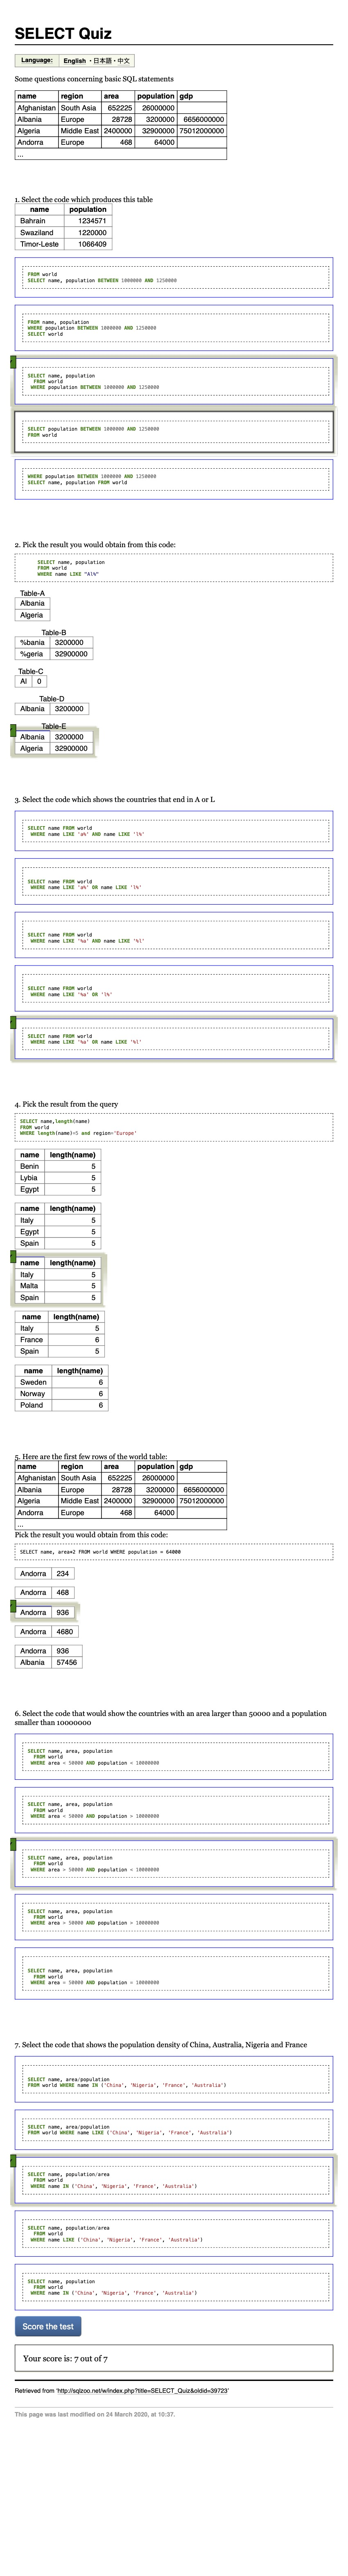